This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/refs/heads/master/census_income.csv")

In [6]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# there is no null in this data now our target variable is object type lets convert it in int

In [11]:
# i am using labelencoder to conert object variable in int
from sklearn.preprocessing import LabelEncoder

In [9]:
lb=LabelEncoder()
df['Income']=lb.fit_transform(df['Income'])

In [12]:
df# here income '<=50' is represent 0 and '>50' is 1 in int format

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [13]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64


Workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


Fnlwgt
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: count, Length: 21647, dtype: int64


Education
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype:

<Axes: >

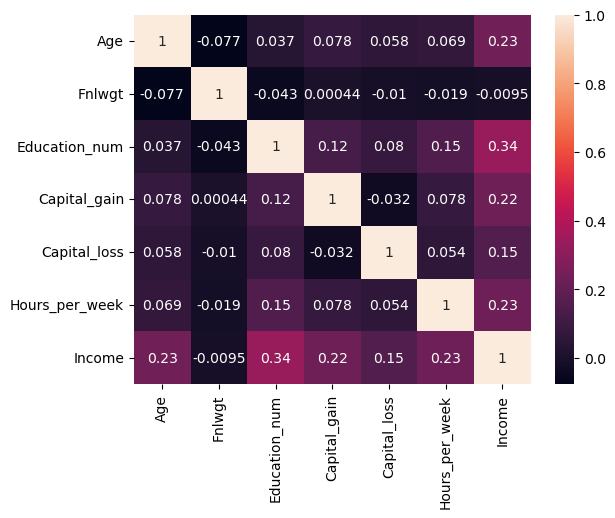

In [15]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## i can see from above correlation graph of numeric columns there is not much of correlation between other and income coumn i can see only education_num has good correlation 

<Axes: xlabel='Income', ylabel='count'>

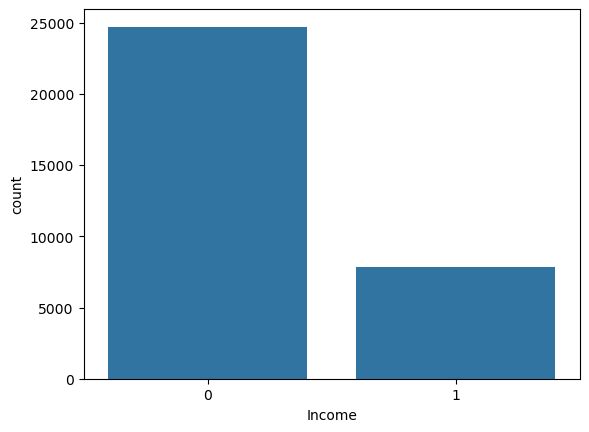

In [16]:
sns.countplot(x='Income',data=df)

more people have <=50k income compare to >50k income

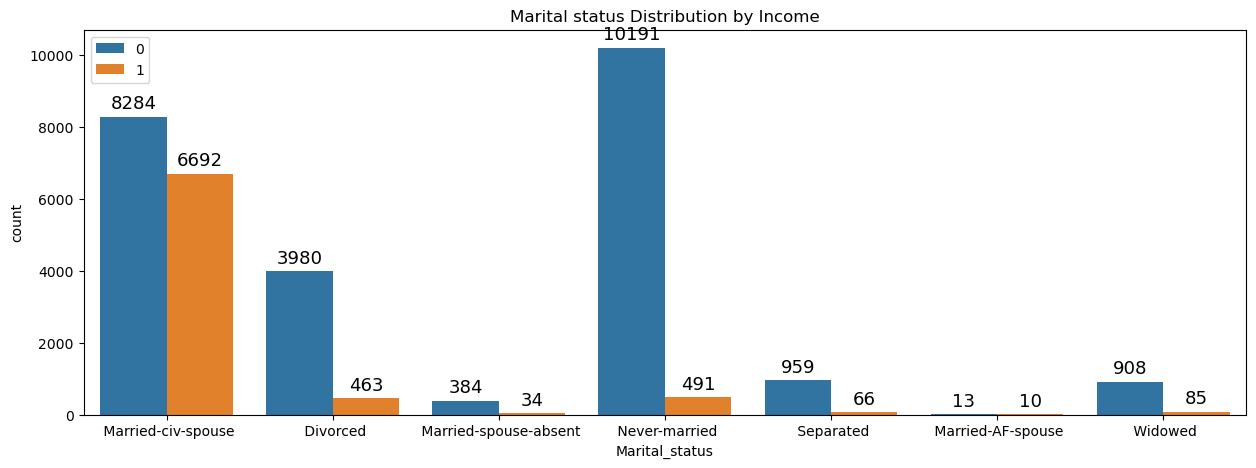

In [37]:
fig= plt.subplots(figsize=(15, 5))

palette = {"Yes": "#e2644c", "No": "#2a6a8b"}

bar = sns.countplot(x='Marital_status', data=df, hue='Income')
plt.title('Marital status Distribution by Income')
for container in bar.containers:
    bar.bar_label(container, labels=[f'{int(label.get_height())}' for label in container],
                  label_type='edge', color='k', fontsize=13, padding=3)
plt.legend(loc='upper left')
plt.show()

<Axes: xlabel='Marital_status', ylabel='count'>

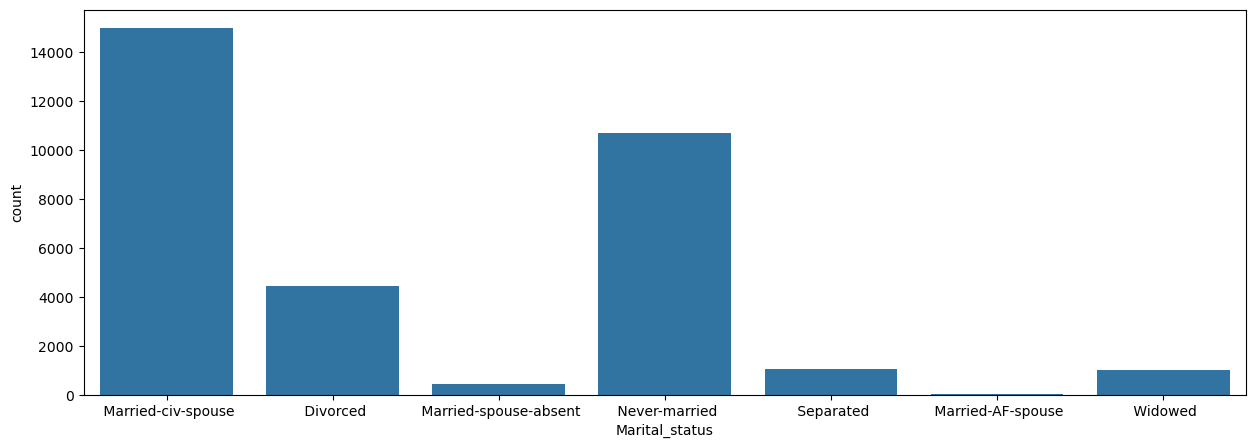

In [32]:
fig= plt.subplots(figsize=(15, 5))
sns.countplot(x='Marital_status',data=df)

# overall i can see there is more number for <=50k but according to marital status there is high number of never married people who have <=50k 

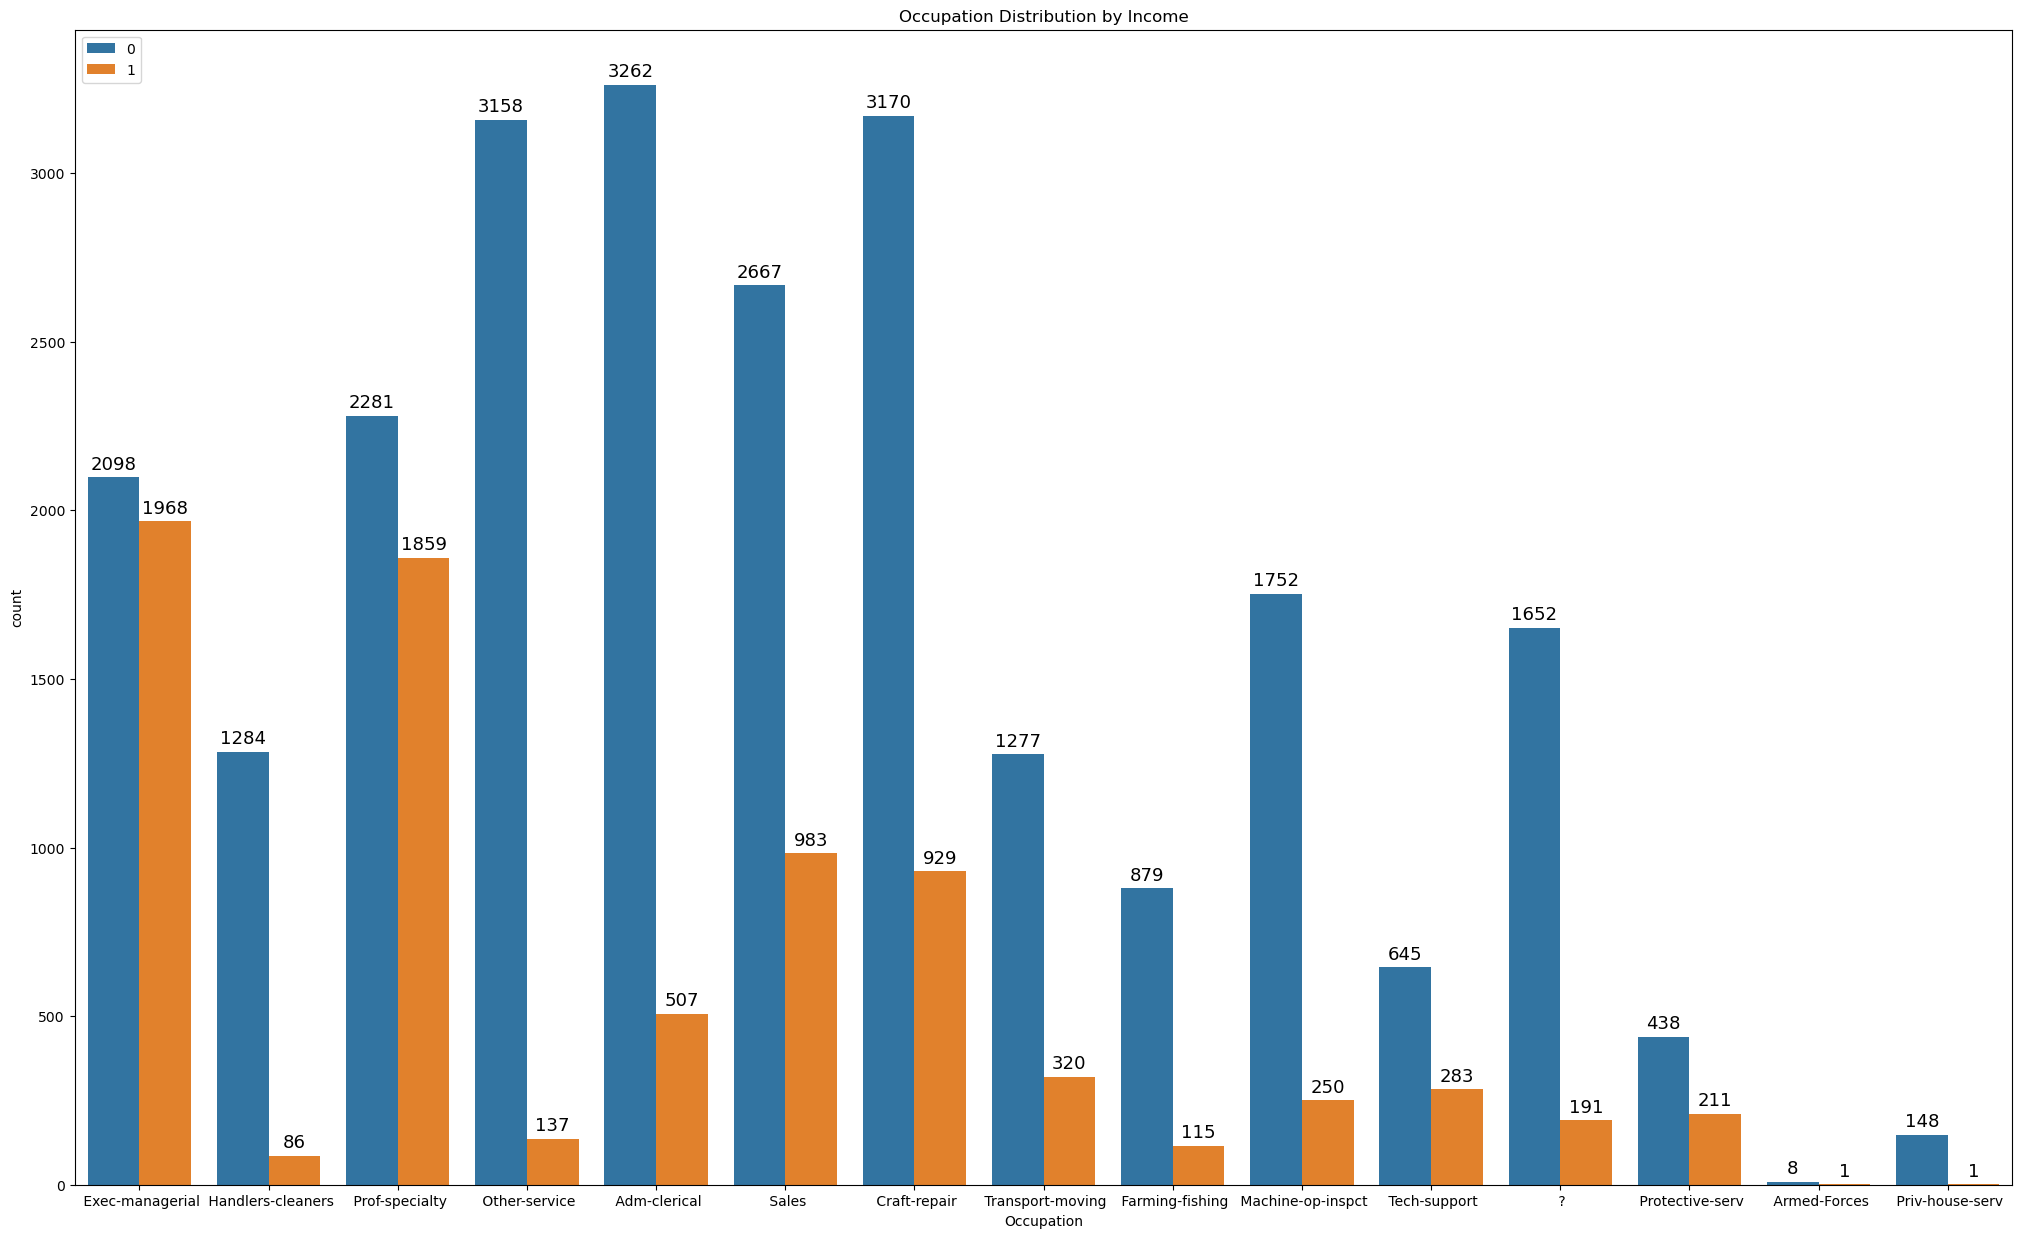

In [39]:
fig= plt.subplots(figsize=(25,15))

palette = {"Yes": "#e2644c", "No": "#2a6a8b"}

bar = sns.countplot(x='Occupation', data=df, hue='Income')
plt.title('Occupation Distribution by Income')
for container in bar.containers:
    bar.bar_label(container, labels=[f'{int(label.get_height())}' for label in container],
                  label_type='edge', color='k', fontsize=13, padding=3)
plt.legend(loc='upper left')
plt.show()

i can see in above graph that other service and adm-clerical occupation has comparatively high number in <50k income and exec-managerial has more number in >50k

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [42]:
#lets convert object type data to numerical type for further analysis
df['Native_country']=lb.fit_transform(df['Native_country'])
df['Sex']=lb.fit_transform(df['Sex'])
df['Race']=lb.fit_transform(df['Race'])
df['Relationship']=lb.fit_transform(df['Relationship'])
df['Occupation']=lb.fit_transform(df['Occupation'])
df['Marital_status']=lb.fit_transform(df['Marital_status'])
df['Education']=lb.fit_transform(df['Education'])
df['Workclass']=lb.fit_transform(df['Workclass'])

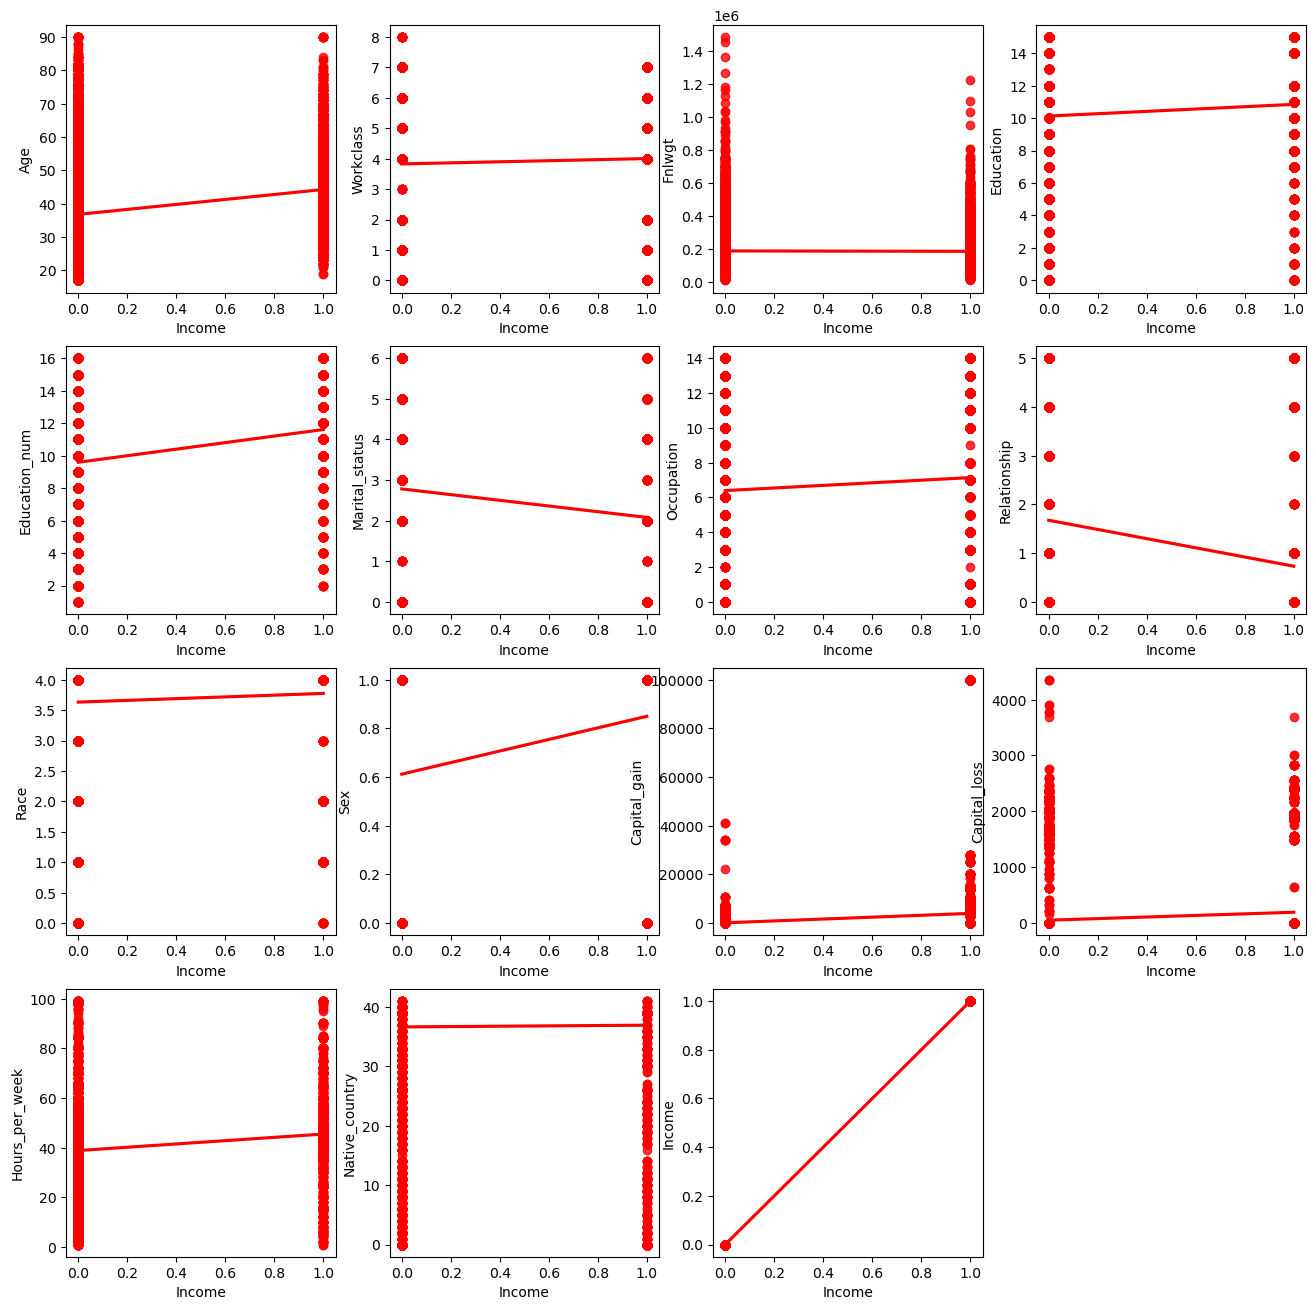

In [44]:
#checking relationship with targetvariable
plt.figure(figsize=(16,16))
p=1
for i in df:
    if p<=15:
        plt.subplot(4,4,p)
        sns.regplot(x='Income',y=i,data=df,color='r')
        #sns.lmplot(data=df1,x='Happiness Score',y=i,palette='colorblind')
        plt.xlabel("Income")
        plt.ylabel(i)
    p+=1
plt.show()

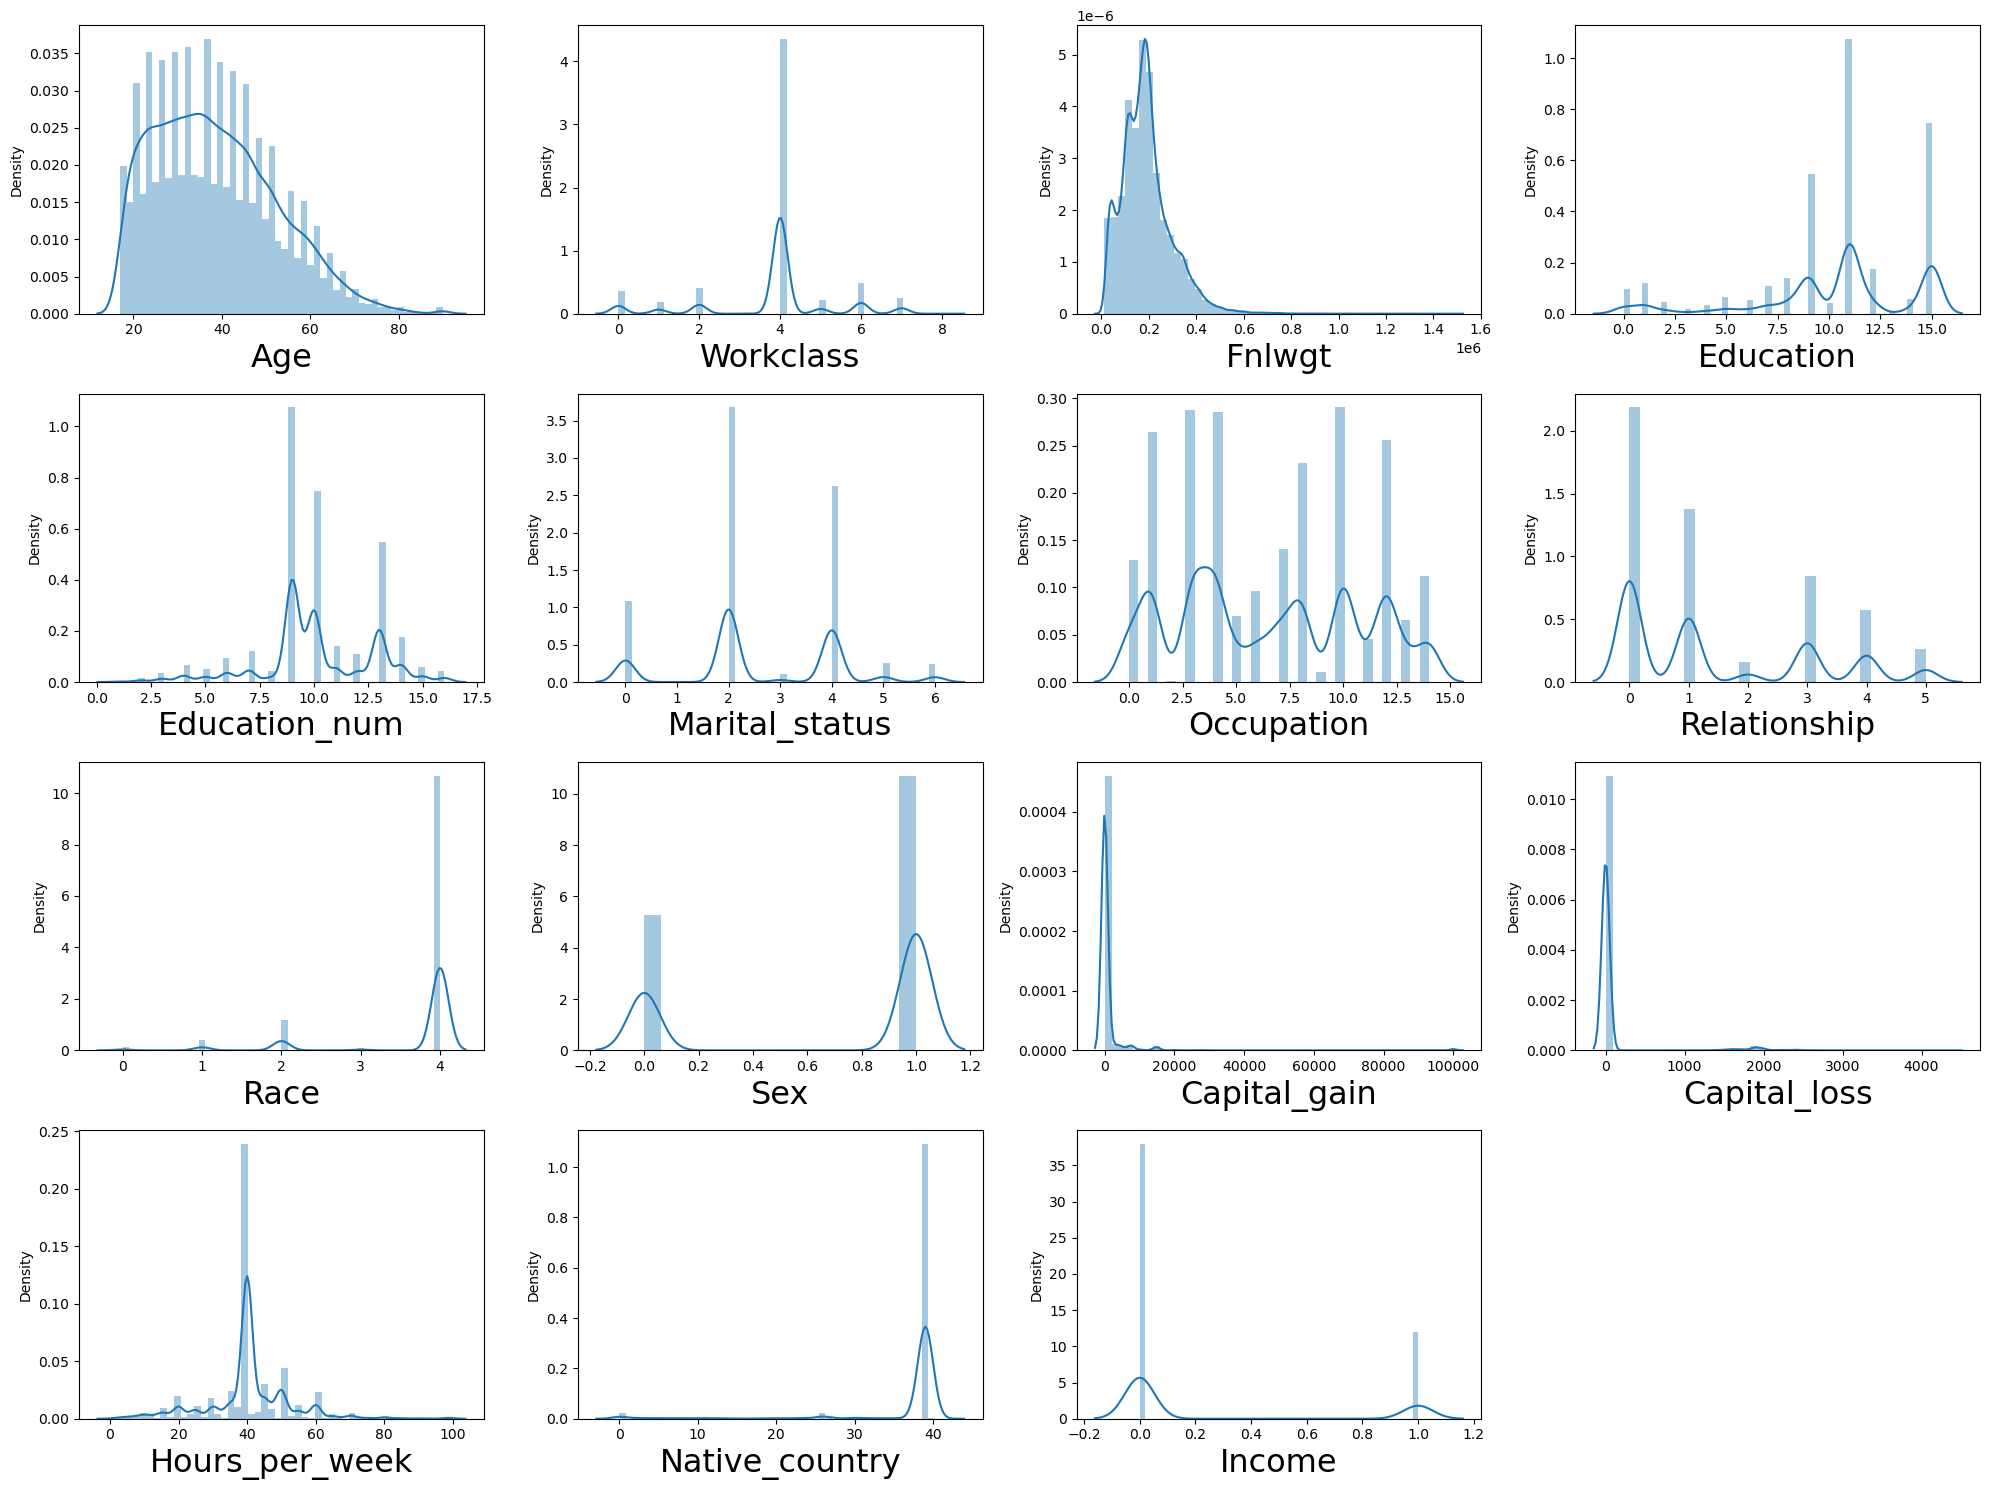

In [45]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=23)
    plotnumber+=1
plt.tight_layout()

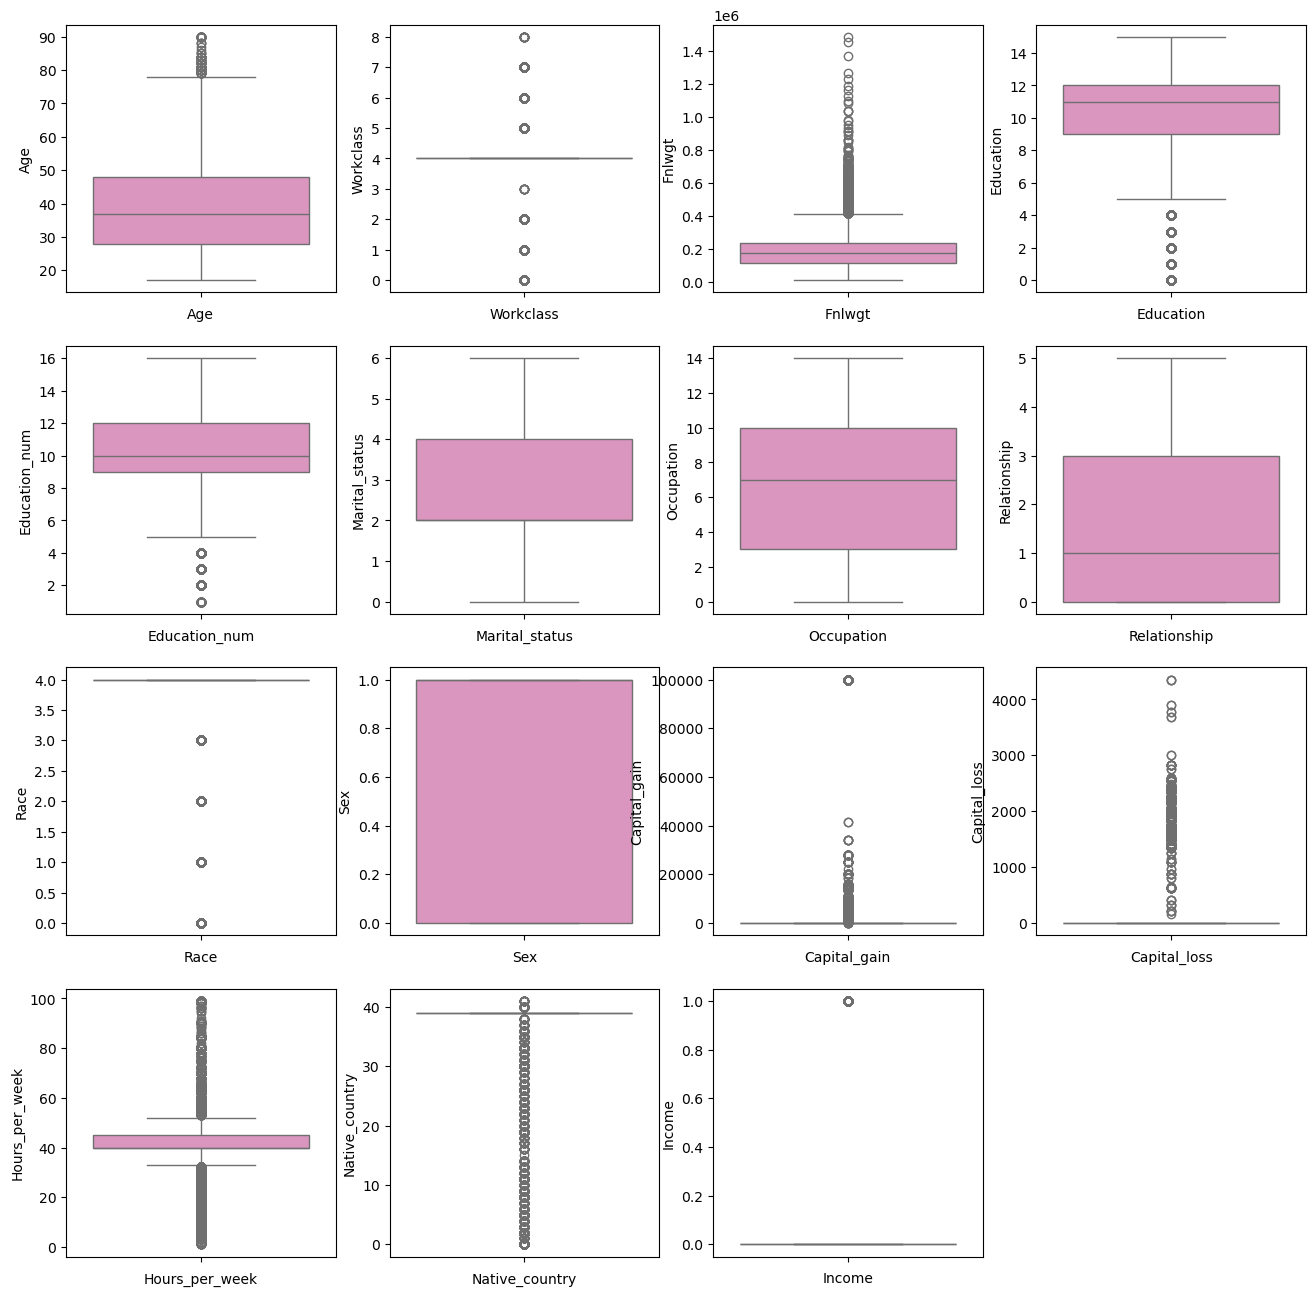

In [47]:
plt.figure(figsize=(16,16))
n=1
for i in df:
    if n<=16:
        plt.subplot(4,4,n)
        sns.boxplot(df[i],palette="Set2_r")
        plt.xlabel(i)
    n+=1
plt.show()

In [48]:
#removing outliers
from scipy.stats import zscore

z=np.abs(zscore(df[['Native_country','Education_num','Age','Education','Capital_gain','Capital_loss']]))
print(np.where(z>3))

(array([    3,    13,    22, ..., 32517, 32524, 32524]), array([0, 0, 5, ..., 4, 0, 2]))


In [49]:
z = np.abs(zscore(df[['Native_country','Education_num','Age','Education','Capital_gain','Capital_loss']]))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (32560, 15)
Shape of the dataframe after removing outliers:  (29188, 15)
Percentage of data loss post outlier removal:  10.356265356265357


In [50]:
df.skew()

Age                0.494877
Workclass         -0.738222
Fnlwgt             1.458218
Education         -0.955732
Education_num     -0.149684
Marital_status    -0.044515
Occupation         0.128769
Relationship       0.746223
Race              -2.479462
Sex               -0.687339
Capital_gain       4.932965
Capital_loss      29.582384
Hours_per_week     0.231937
Native_country    -4.808536
Income             1.323138
dtype: float64

In [60]:
#assigning feature and target variable
x = df.drop('Income',axis=1)
y = df['Income']
print("feature dimension=",x.shape)
print('label Dimension',y.shape)

feature dimension= (29188, 14)
label Dimension (29188,)


In [61]:
#standard scaling of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.884976,1.463905,-1.000891,-0.345802,1.207043,-0.406320,-0.598243,-0.916653,0.389083,0.713749,-0.244724,-0.037275,-2.222413,0.221904
1,-0.010591,0.093283,0.249518,0.170676,-0.443690,-1.725306,-0.127576,-0.294900,0.389083,0.713749,-0.244724,-0.037275,-0.023588,0.221904
2,1.108867,0.093283,0.429755,-2.411716,-1.269056,-0.406320,-0.127576,-0.916653,-1.996746,0.713749,-0.244724,-0.037275,-0.023588,0.221904
3,-0.085221,0.093283,0.900882,0.428915,1.619726,-0.406320,-0.598243,2.192112,0.389083,-1.401052,-0.244724,-0.037275,-0.023588,0.221904
4,0.810345,0.093283,-0.274504,-1.120520,-2.094422,0.253173,0.343091,-0.294900,-1.996746,-1.401052,-0.244724,-0.037275,-1.978099,-4.990924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29183,-0.831526,0.093283,0.643118,-0.862281,0.794360,-0.406320,1.519760,2.192112,0.389083,-1.401052,-0.244724,-0.037275,-0.186464,0.221904
29184,0.138670,0.093283,-0.329430,0.170676,-0.443690,-0.406320,0.107758,-0.916653,0.389083,0.713749,-0.244724,-0.037275,-0.023588,0.221904
29185,1.482020,0.093283,-0.352711,0.170676,-0.443690,2.231652,-1.304244,1.570359,0.389083,-1.401052,-0.244724,-0.037275,-0.023588,0.221904
29186,-1.204679,0.093283,0.115761,0.170676,-0.443690,0.912666,-1.304244,0.948606,0.389083,0.713749,-0.244724,-0.037275,-1.652347,0.221904


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS =0
for i in range(1,110):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)# training model
    pred = RFR.predict(x_test)# predicting y test
    acc = accuracy_score(y_test,pred)# give accuracy score
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i# setting best random state for higher accuracy
print('Best accuracy is',maxAccu,'at random_state',maxRS)

Best accuracy is 0.8609112709832134 at random_state 36


In [63]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
# creating one function for various classification model
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=36)
    model.fit(x_train,y_train)# Training the model
    pred = model.predict(x_test)# predicting y test
    acc = accuracy_score(y_test,pred)# give accuracy score
    print("accuracy score",acc)
    print("classification_report",classification_report(y_test,pred))
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = maxRS)

In [66]:
# Support Vector Classifier
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=78)
classify(model, x, y)

accuracy score 0.8567904618336303
classification_report               precision    recall  f1-score   support

           0       0.88      0.95      0.91      5706
           1       0.75      0.51      0.61      1591

    accuracy                           0.86      7297
   macro avg       0.81      0.73      0.76      7297
weighted avg       0.85      0.86      0.85      7297

Cross Validation Score: 0.8494246077476598

Accuracy Score - Cross Validation Score is 0.007365854085970458


In [67]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model,x,y)

accuracy score 0.8454159243524736
classification_report               precision    recall  f1-score   support

           0       0.89      0.92      0.90      5706
           1       0.67      0.58      0.62      1591

    accuracy                           0.85      7297
   macro avg       0.78      0.75      0.76      7297
weighted avg       0.84      0.85      0.84      7297

Cross Validation Score: 0.8444225485516285

Accuracy Score - Cross Validation Score is 0.000993375800845131


In [68]:
#GradientBoostingClassifier
model=GradientBoostingClassifier()
classify(model,x,y)

accuracy score 0.8677538714540222
classification_report               precision    recall  f1-score   support

           0       0.89      0.95      0.92      5706
           1       0.76      0.57      0.65      1591

    accuracy                           0.87      7297
   macro avg       0.83      0.76      0.79      7297
weighted avg       0.86      0.87      0.86      7297

Cross Validation Score: 0.8632317210917139

Accuracy Score - Cross Validation Score is 0.004522150362308297


In [69]:
#bagging
model=BaggingClassifier()
classify(model,x,y)

accuracy score 0.847608606276552
classification_report               precision    recall  f1-score   support

           0       0.88      0.93      0.91      5706
           1       0.69      0.55      0.61      1591

    accuracy                           0.85      7297
   macro avg       0.79      0.74      0.76      7297
weighted avg       0.84      0.85      0.84      7297

Cross Validation Score: 0.8413735004800682

Accuracy Score - Cross Validation Score is 0.006235105796483786


In [70]:
#AdaBoostClassifier
model=AdaBoostClassifier()
classify(model,x,y)

accuracy score 0.8648759764286693
classification_report               precision    recall  f1-score   support

           0       0.89      0.94      0.92      5706
           1       0.74      0.58      0.65      1591

    accuracy                           0.86      7297
   macro avg       0.82      0.76      0.78      7297
weighted avg       0.86      0.86      0.86      7297

Cross Validation Score: 0.8590861782783079

Accuracy Score - Cross Validation Score is 0.005789798150361403


In [71]:
model=RandomForestClassifier(max_depth=15, random_state=41)
classify(model,x,y)

accuracy score 0.8656982321501987
classification_report               precision    recall  f1-score   support

           0       0.89      0.95      0.92      5706
           1       0.75      0.58      0.65      1591

    accuracy                           0.87      7297
   macro avg       0.82      0.76      0.78      7297
weighted avg       0.86      0.87      0.86      7297

Cross Validation Score: 0.8610047080669245

Accuracy Score - Cross Validation Score is 0.00469352408327417


# i am choosing ExtraTrees classifier bcz it has least difference

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
parameters = {'n_estimators':[1, 2, 3, 4, 5],'max_samples': [2.5, 0.1, 0.2, 0.3,4.0],'max_features':[1.0,2.0,3.0,4.0,5.0],'bootstrap':[True,False]}
gscv = GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [1.0, 2.0, 3.0, 4.0, 5.0],
                         'max_samples': [2.5, 0.1, 0.2, 0.3, 4.0],
                         'n_estimators': [1, 2, 3, 4, 5]})

In [74]:
gscv.best_params_

{'bootstrap': True, 'max_features': 1.0, 'max_samples': 0.2, 'n_estimators': 4}

In [75]:
Final_Model =ExtraTreesClassifier(max_samples=0.2,n_estimators=4,max_features=1.0,bootstrap=True)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 84.30861998081404


In [76]:
import pickle
filename = 'Census_Income_classifier.pkl'
pickle.dump(model,open(filename,'wb'))

In [78]:
import pickle
load_model = pickle.load(open('Census_Income_classifier.pkl','rb'))
result = load_model.score(x_test,y_test)
print(result*100)

86.56982321501987


In [80]:
conclusion = pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=['Predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,7287,7288,7289,7290,7291,7292,7293,7294,7295,7296
Predicted,0,1,1,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
original,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
